## Random Forests

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Decision Tree model from SKLearn
from sklearn.ensemble import RandomForestClassifier

#Provides a way to split the data into train and test data sets.
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,  roc_auc_score

In [82]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## Classification Measures

Precision
$$ p=\frac{tp}{tp+fp} $$

Recall
$$ r=\frac{tp}{tp+fn} $$

$$ F_{1} Score = 2 \times \frac{p \times r}{p + r} $$

In [83]:
#long_census = pd.read_csv('adult_census/final_data_set.csv')
long_census = pd.read_csv('adult_census/balanced.csv')

In [84]:
len(long_census)

14000

In [85]:
X = long_census.iloc[:,5:107]
y = long_census['salary']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

In [87]:
clf = RandomForestClassifier(random_state=0, 
                             bootstrap=True,
                             max_samples=500,
                             max_features=10)
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=10, max_samples=500, random_state=0)

In [88]:
y_pred = clf.predict(X_test)

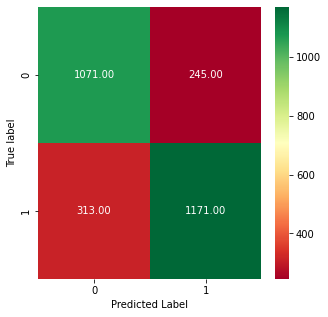

In [89]:
plot_cm(y_pred, y_test)

In [90]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1316
           1       0.83      0.79      0.81      1484

    accuracy                           0.80      2800
   macro avg       0.80      0.80      0.80      2800
weighted avg       0.80      0.80      0.80      2800

